In [1]:
from model import RungeKuttaIntegratorCell, create_model, RNN, Sequential, RMSprop, tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2021-10-23 21:59:46.623017: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-23 21:59:46.623046: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import os
import importlib

In [3]:
# os.getcwd()

In [4]:
# masses, spring coefficients, and damping coefficients
alpha = np.array([0.015], dtype='float32')  # initial guess, true value is 0.2
T = 12.
omega = np.array([(2*np.pi / T)], dtype='float32')

In [5]:
df_all = pd.read_csv('./data.csv', sep=";", decimal=",", header=0)

In [6]:
ub = df_all.max().loc["tetha"]
lb = df_all.min().loc["tetha"]

In [7]:
df = df_all.loc[ df_all.loc[:, "case"] == 0, :]
df

,time,case,theta0,theta_dot0,u,tetha,theta_dot
0,0.0,0,0.192342,1.057883,0,0.138456,1.003997
1,0.5,0,0.192342,1.057883,0,0.631661,0.848859
2,1.0,0,0.192342,1.057883,0,1.015907,0.641543
3,1.5,0,0.192342,1.057883,0,1.375889,0.502063
4,2.0,0,0.192342,1.057883,0,1.658025,0.388829
...,...,...,...,...,...,...,...
76,38.0,0,0.192342,1.057883,0,0.021129,0.060014
77,38.5,0,0.192342,1.057883,0,-0.018472,0.005161
78,39.0,0,0.192342,1.057883,0,0.017835,0.026135
79,39.5,0,0.192342,1.057883,0,-0.008569,-0.014694


In [8]:
# data
t  = df.loc[:, "time"].values
dt = (t[1] - t[0])
utrain = df.loc[:, ["u"]].values[np.newaxis, :, :]
tetha_train = df.loc[:, ["tetha"]].values[np.newaxis, :, :]

In [9]:
utrain.shape

(1, 81, 1)

In [10]:
# fitting physics-informed neural network
initial_state = df.loc[:, ["theta0", "theta_dot0"]].iloc[[0], :].astype("float32").values
# create_model(omega, alpha, dt, initial_state, batch_input_shape, return_sequences=True, unroll=False)

In [15]:
model = create_model(omega, alpha, dt, initial_state=initial_state, ub=ub, lb=lb, batch_input_shape=utrain.shape)

In [16]:
yPred_before = model.predict_on_batch(utrain)[0, :, :]

In [17]:
historic = model.fit(utrain, tetha_train, epochs=100, steps_per_epoch=1, verbose=1)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 3.1483 - mae: 1.5614
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 3.0206 - mae: 1.5305
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 2.9140 - mae: 1.5063
Epoch 4/100
1/1 [==============================] - 0s 36ms/step - loss: 2.8191 - mae: 1.4862
Epoch 5/100
1/1 [==============================] - 0s 42ms/step - loss: 2.7297 - mae: 1.4655
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 2.6420 - mae: 1.4495
Epoch 7/100
1/1 [==============================] - 0s 46ms/step - loss: 2.5541 - mae: 1.4238
Epoch 8/100
1/1 [==============================] - 0s 52ms/step - loss: 2.4653 - mae: 1.4012
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 2.3758 - mae: 1.3795
Epoch 10/100
1/1 [==============================] - 0s 44ms/step - loss: 2.2861 - mae: 1.3527
Epoch 11/100
1/1 [==============================] - 0s 55ms/step - loss

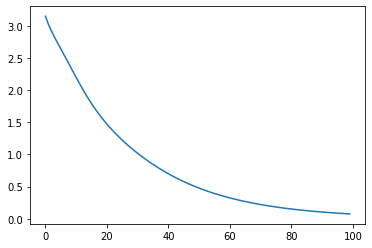

In [21]:
plt.plot(historic.history["loss"])

In [22]:
yPred = model.predict_on_batch(utrain)[0, :, :]

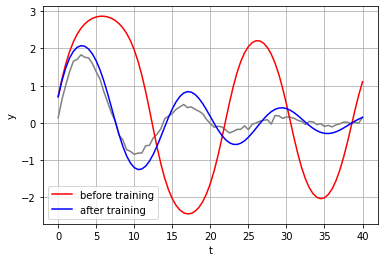

In [23]:
plt.plot(t, tetha_train[0, :, :], 'gray')
plt.plot(t, yPred_before[:, :], 'r', label='before training')
plt.plot(t, yPred[:, :], 'b', label='after training')
plt.xlabel('t')
plt.ylabel('y')
plt.grid('on')
plt.legend()
plt.show()